In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
raw_data = pd.read_csv('Subset_Properties.csv')

print(raw_data.head())

   Unnamed: 0               index                   61                   62  \
0           0          Unnamed: 0  2000-01-01 00:00:00  2000-02-01 00:00:00   
1           1      City of London          173738.4667          174151.8041   
2           2  Barking & Dagenham          71079.19356          72633.03953   
3           3              Barnet          153676.0556          156796.7398   
4           4              Bexley          94978.46681           96820.1285   

                    63                   64                   65  \
0  2000-03-01 00:00:00  2000-04-01 00:00:00  2000-05-01 00:00:00   
1          178338.5158          183100.9126          175040.6662   
2          73623.57292          73800.30431          75125.95318   
3          159938.6457          162987.5883          165737.2084   
4          98306.41584          99377.57806          101274.2597   

                    66                   67                   68  ...  \
0  2000-06-01 00:00:00  2000-07-01 00:00:00

In [5]:
#Step one in cleaning the data = removing row 1, so that the 2nd row becomes the header
data = pd.read_csv('Subset_Properties.csv', header=1)
print(data.head())

   0          Unnamed: 0  2000-01-01 00:00:00  2000-02-01 00:00:00  \
0  1      City of London         173738.46670         174151.80410   
1  2  Barking & Dagenham          71079.19356          72633.03953   
2  3              Barnet         153676.05560         156796.73980   
3  4              Bexley          94978.46681          96820.12850   
4  5               Brent         126784.81960         129605.30540   

   2000-03-01 00:00:00  2000-04-01 00:00:00  2000-05-01 00:00:00  \
0         178338.51580         183100.91260         175040.66620   
1          73623.57292          73800.30431          75125.95318   
2         159938.64570         162987.58830         165737.20840   
3          98306.41584          99377.57806         101274.25970   
4         134098.12820         137261.22450         140112.58480   

   2000-06-01 00:00:00  2000-07-01 00:00:00  2000-08-01 00:00:00  ...  \
0         198191.03270         214852.41490         221951.71290  ...   
1          76939.36185  

In [7]:
#Remove the empty columns for now and revisit the analysis columns later.
columns_to_remove = ['Unnamed: 290', 'Unnamed: 291', 'Unnamed: 292', 'Unnamed: 293', 'Unnamed: 294']
data.drop(columns=columns_to_remove, inplace=True, errors='ignore')

In [11]:
print(data.shape)
print(data.head())

(48, 290)
   0          Unnamed: 0  2000-01-01 00:00:00  2000-02-01 00:00:00  \
0  1      City of London         173738.46670         174151.80410   
1  2  Barking & Dagenham          71079.19356          72633.03953   
2  3              Barnet         153676.05560         156796.73980   
3  4              Bexley          94978.46681          96820.12850   
4  5               Brent         126784.81960         129605.30540   

   2000-03-01 00:00:00  2000-04-01 00:00:00  2000-05-01 00:00:00  \
0         178338.51580         183100.91260         175040.66620   
1          73623.57292          73800.30431          75125.95318   
2         159938.64570         162987.58830         165737.20840   
3          98306.41584          99377.57806         101274.25970   
4         134098.12820         137261.22450         140112.58480   

   2000-06-01 00:00:00  2000-07-01 00:00:00  2000-08-01 00:00:00  ...  \
0         198191.03270         214852.41490         221951.71290  ...   
1          769

In [15]:
data.to_csv('Cleaned_London_House_Data.csv', index=False)

In [17]:
print(data.head())

   0          Unnamed: 0  2000-01-01 00:00:00  2000-02-01 00:00:00  \
0  1      City of London         173738.46670         174151.80410   
1  2  Barking & Dagenham          71079.19356          72633.03953   
2  3              Barnet         153676.05560         156796.73980   
3  4              Bexley          94978.46681          96820.12850   
4  5               Brent         126784.81960         129605.30540   

   2000-03-01 00:00:00  2000-04-01 00:00:00  2000-05-01 00:00:00  \
0         178338.51580         183100.91260         175040.66620   
1          73623.57292          73800.30431          75125.95318   
2         159938.64570         162987.58830         165737.20840   
3          98306.41584          99377.57806         101274.25970   
4         134098.12820         137261.22450         140112.58480   

   2000-06-01 00:00:00  2000-07-01 00:00:00  2000-08-01 00:00:00  ...  \
0         198191.03270         214852.41490         221951.71290  ...   
1          76939.36185  

In [25]:
import pandas as pd

# Attempt to convert the column names (excluding the first) to datetime
date_columns = pd.to_datetime(data.columns[1:], errors='coerce')

# Drop invalid dates (NaT) if any exist
valid_date_columns = date_columns[~date_columns.isna()]

# Combine 'Borough' with valid formatted date columns
data.columns = ['Borough'] + valid_date_columns.strftime('%Y-%m-%d').tolist()


ValueError: Length mismatch: Expected axis has 290 elements, new values have 289 elements

In [27]:
# Number of original columns
print(f"Original number of columns: {len(data.columns)}")

# Convert column names to datetime
date_columns = pd.to_datetime(data.columns[1:], errors='coerce')

# Number of valid datetime columns
print(f"Number of valid datetime columns: {date_columns.notna().sum()}")


Original number of columns: 290
Number of valid datetime columns: 288


In [29]:
# Identify columns that are invalid (NaT)
invalid_columns = data.columns[1:][pd.to_datetime(data.columns[1:], errors='coerce').isna()]
print(f"Invalid columns: {invalid_columns.tolist()}")


Invalid columns: [nan]


In [31]:
data.drop(columns=invalid_columns, inplace=True)


In [33]:
# Convert remaining column names to datetime
date_columns = pd.to_datetime(data.columns[1:], errors='coerce')

# Combine 'Borough' with valid formatted date columns
data.columns = ['Borough'] + date_columns.strftime('%Y-%m-%d').tolist()


In [35]:
print(data.columns[:10])  # First few column names
print(data.head())        # First few rows


Index(['Borough', '2000-01-01', '2000-02-01', '2000-03-01', '2000-04-01',
       '2000-05-01', '2000-06-01', '2000-07-01', '2000-08-01', '2000-09-01'],
      dtype='object')
   Borough    2000-01-01    2000-02-01    2000-03-01    2000-04-01  \
0        1  173738.46670  174151.80410  178338.51580  183100.91260   
1        2   71079.19356   72633.03953   73623.57292   73800.30431   
2        3  153676.05560  156796.73980  159938.64570  162987.58830   
3        4   94978.46681   96820.12850   98306.41584   99377.57806   
4        5  126784.81960  129605.30540  134098.12820  137261.22450   

     2000-05-01    2000-06-01    2000-07-01    2000-08-01    2000-09-01  ...  \
0  175040.66620  198191.03270  214852.41490  221951.71290  223175.16740  ...   
1   75125.95318   76939.36185   78868.70986   80149.97701   81760.76299  ...   
2  165737.20840  169025.20400  170520.83000  173966.39290  175610.15770  ...   
3  101274.25970  102653.91810  104526.30020  106695.67620  108170.29870  ...   
4  14

In [37]:
print(data['Borough'].head())

0    1
1    2
2    3
3    4
4    5
Name: Borough, dtype: int64


In [39]:
# Reload the original 
original_data = pd.read_csv('Subset_Properties.csv', header=1)

# Extract the Borough column
data['Borough'] = original_data.iloc[:, 1]  # Assuming the second column contains borough names

print(data['Borough'].head())

0        City of London
1    Barking & Dagenham
2                Barnet
3                Bexley
4                 Brent
Name: Borough, dtype: object


In [41]:
# Move 'Borough' to the front
columns = ['Borough'] + [col for col in data.columns if col != 'Borough']
data = data[columns]


In [43]:
print(data.head())

              Borough    2000-01-01    2000-02-01    2000-03-01    2000-04-01  \
0      City of London  173738.46670  174151.80410  178338.51580  183100.91260   
1  Barking & Dagenham   71079.19356   72633.03953   73623.57292   73800.30431   
2              Barnet  153676.05560  156796.73980  159938.64570  162987.58830   
3              Bexley   94978.46681   96820.12850   98306.41584   99377.57806   
4               Brent  126784.81960  129605.30540  134098.12820  137261.22450   

     2000-05-01    2000-06-01    2000-07-01    2000-08-01    2000-09-01  ...  \
0  175040.66620  198191.03270  214852.41490  221951.71290  223175.16740  ...   
1   75125.95318   76939.36185   78868.70986   80149.97701   81760.76299  ...   
2  165737.20840  169025.20400  170520.83000  173966.39290  175610.15770  ...   
3  101274.25970  102653.91810  104526.30020  106695.67620  108170.29870  ...   
4  140112.58480  142654.49120  143702.39540  144148.48000  146653.82030  ...   

   2023-03-01  2023-04-01  2023-

In [45]:
data.to_csv('Cleaned_London_House_Data.csv', index=False)

In [47]:
print(data.head())

              Borough    2000-01-01    2000-02-01    2000-03-01    2000-04-01  \
0      City of London  173738.46670  174151.80410  178338.51580  183100.91260   
1  Barking & Dagenham   71079.19356   72633.03953   73623.57292   73800.30431   
2              Barnet  153676.05560  156796.73980  159938.64570  162987.58830   
3              Bexley   94978.46681   96820.12850   98306.41584   99377.57806   
4               Brent  126784.81960  129605.30540  134098.12820  137261.22450   

     2000-05-01    2000-06-01    2000-07-01    2000-08-01    2000-09-01  ...  \
0  175040.66620  198191.03270  214852.41490  221951.71290  223175.16740  ...   
1   75125.95318   76939.36185   78868.70986   80149.97701   81760.76299  ...   
2  165737.20840  169025.20400  170520.83000  173966.39290  175610.15770  ...   
3  101274.25970  102653.91810  104526.30020  106695.67620  108170.29870  ...   
4  140112.58480  142654.49120  143702.39540  144148.48000  146653.82030  ...   

   2023-03-01  2023-04-01  2023-

In [53]:
#Removing 3 lines that were empty rows
print(data.loc[data['Borough'].isin(['Unnamed: 34', 'Unnamed: 37', 'Unnamed: 47'])])

        Borough  2000-01-01  2000-02-01  2000-03-01  2000-04-01  2000-05-01  \
33  Unnamed: 34         NaN         NaN         NaN         NaN         NaN   
36  Unnamed: 37         NaN         NaN         NaN         NaN         NaN   
46  Unnamed: 47         NaN         NaN         NaN         NaN         NaN   

    2000-06-01  2000-07-01  2000-08-01  2000-09-01  ...  2023-03-01  \
33         NaN         NaN         NaN         NaN  ...         NaN   
36         NaN         NaN         NaN         NaN  ...         NaN   
46         NaN         NaN         NaN         NaN  ...         NaN   

    2023-04-01  2023-05-01  2023-06-01  2023-07-01  2023-08-01  2023-09-01  \
33         NaN         NaN         NaN         NaN         NaN         NaN   
36         NaN         NaN         NaN         NaN         NaN         NaN   
46         NaN         NaN         NaN         NaN         NaN         NaN   

    2023-10-01  2023-11-01  2023-12-01  
33         NaN         NaN         NaN  
36 

In [55]:
data = data[~data['Borough'].isin(['Unnamed: 34', 'Unnamed: 37', 'Unnamed: 47'])]

In [57]:
print(data['Borough'].unique())

['City of London' 'Barking & Dagenham' 'Barnet' 'Bexley' 'Brent' 'Bromley'
 'Camden' 'Croydon' 'Ealing' 'Enfield' 'Greenwich' 'Hackney'
 'Hammersmith & Fulham' 'Haringey' 'Harrow' 'Havering' 'Hillingdon'
 'Hounslow' 'Islington' 'Kensington & Chelsea' 'Kingston upon Thames'
 'Lambeth' 'Lewisham' 'Merton' 'Newham' 'Redbridge' 'Richmond upon Thames'
 'Southwark' 'Sutton' 'Tower Hamlets' 'Waltham Forest' 'Wandsworth'
 'Westminster' 'Inner London' 'Outer London' 'NORTH EAST' 'NORTH WEST'
 'YORKS & THE HUMBER' 'EAST MIDLANDS' 'WEST MIDLANDS' 'EAST OF ENGLAND'
 'LONDON' 'SOUTH EAST' 'SOUTH WEST' 'England']


In [59]:
data.to_csv('Final_Cleaned_London_House_Data.csv', index=False)

In [61]:
#Adding calculation columns to the data table
data['24_yr_min'] = data.iloc[:, 1:].min(axis=1)
data['24_yr_max'] = data.iloc[:, 1:].max(axis=1)
data['24_yr_median'] = data.iloc[:, 1:].median(axis=1)
data['24_yr_mean'] = data.iloc[:, 1:].mean(axis=1)

start_col = '2000-01-01'
end_col = '2023-12-01'
data['24_yr_percentage_change'] = ((data[end_col] - data[start_col]) / data[start_col]) * 100

In [63]:
print(data[['Borough', '24_yr_min', '24_yr_max', '24_yr_median', '24_yr_mean', '24_yr_percentage_change']].head())

              Borough     24_yr_min  24_yr_max  24_yr_median     24_yr_mean  \
0      City of London  173738.46670  1033995.0  497265.67445  558279.091412   
1  Barking & Dagenham   71079.19356   345399.0  176699.00065  207364.719977   
2              Barnet  153676.05560   608267.0  348179.15140  388245.795593   
3              Bexley   94978.46681   417739.0  209587.93215  244628.829595   
4               Brent  126784.81960   555888.0  304963.23965  346380.195333   

   24_yr_percentage_change  
0               364.678902  
1               371.355939  
2               276.437304  
3               311.631197  
4               302.413319  


In [65]:
data.to_csv('Enhanced_London_House_Data.csv', index=False)

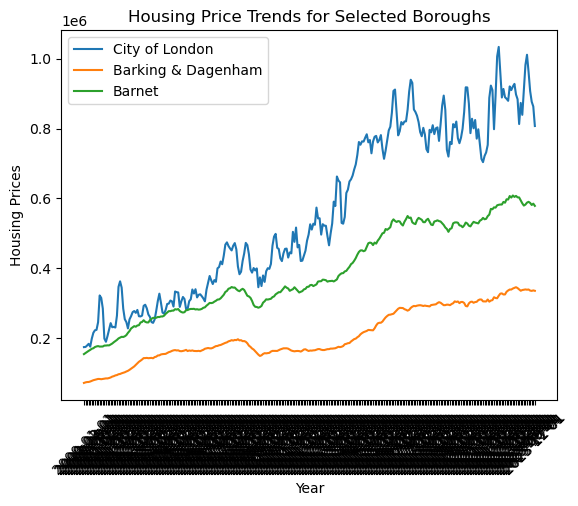

In [69]:
import matplotlib.pyplot as plt

#Testing out plotting using 3 sample boroughs
selected_boroughs = ['City of London', 'Barking & Dagenham', 'Barnet']
for borough in selected_boroughs:
    borough_data = data[data['Borough'] == borough].iloc[:, 1:-5]
    plt.plot(borough_data.columns, borough_data.values[0], label=borough)

plt.xlabel('Year')
plt.ylabel('Housing Prices')
plt.title('Housing Price Trends for Selected Boroughs')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [73]:
#Sorting the data to find the 5 boroughs with the greatest percentage increase and the 5 boroughs with the 5 lowest percentage increases.

#Sort by percentage change in descending order
sorted_data = data.sort_values(by='24_yr_percentage_change', ascending=False)


#Top 5
top_5_boroughs = sorted_data[['Borough', '24_yr_percentage_change']].head(5)

#Bottom 5
bottom_5_boroughs = sorted_data[['Borough', '24_yr_percentage_change']].tail(5)

print("Top 5 London Boroughs with Highest % House Price Growth from Jan 2000-Dec 2023:")
print(top_5_boroughs)

print("Bottom 5 London Boroughs with Lowest % House Price Growth from Jan 2000-Dec 2023:")
print(bottom_5_boroughs)

Top 5 London Boroughs with Highest % House Price Growth from Jan 2000-Dec 2023:
               Borough  24_yr_percentage_change
30      Waltham Forest               412.459776
11             Hackney               397.367318
24              Newham               384.416537
1   Barking & Dagenham               371.355939
0       City of London               364.678902
Bottom 5 London Boroughs with Lowest % House Price Growth from Jan 2000-Dec 2023:
                 Borough  24_yr_percentage_change
12  Hammersmith & Fulham               248.110827
29         Tower Hamlets               247.443507
26  Richmond upon Thames               245.516154
17              Hounslow               241.901977
37            NORTH EAST               235.701251


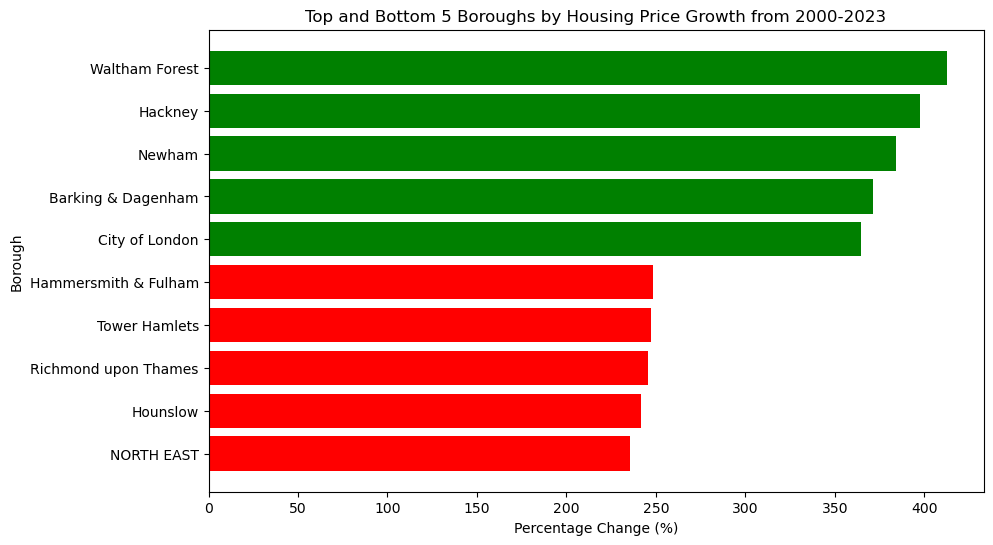

In [77]:
#Visual representation of the Top 5 vs Bottom 5
import matplotlib.pyplot as plt

#Combine top and bottom into one variable
top_bottom_boroughs = pd.concat([top_5_boroughs, bottom_5_boroughs])

#Plot
plt.figure(figsize=(10, 6))
plt.barh(top_bottom_boroughs['Borough'], top_bottom_boroughs['24_yr_percentage_change'], color=['green']*5 + ['red']*5)
plt.xlabel('Percentage Change (%)')
plt.ylabel('Borough')
plt.title('Top and Bottom 5 Boroughs by Housing Price Growth from 2000-2023')
plt.gca().invert_yaxis() #Inverting the y-axis for visual effect
plt.show()